In [1]:
import aesara
import nutpie
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import scipy.stats as st

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\llvmlite\llvmpy\__init__.py:3: UserWarning: The module `llvmlite.llvmpy` is deprecated and will be removed in the future.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\llvmlite\llvmpy\core.py:8: UserWarning: The module `llvmlite.llvmpy.core` is deprecated and will be removed in the future. Equivalent functionality is provided by `llvmlite.ir`.
  warnings.warn(


In [2]:
%run ABC_utils.ipynb


In [3]:
def genData(N, ndim, mu_true, sigma2_true):
    #N = 100
    #sigma2_true = 1**2
    #mu_true = -1.8 #np.random.normal(0, 1)
    
    if N == 1:
        data = st.multivariate_normal(mean = np.ones(ndim) * mu_true, cov = np.identity(ndim) * sigma2_true).rvs(1)
    else: 
        data = np.random.normal(mu_true, np.sqrt(sigma2_true), N)
    return data

In [4]:
def normal_sim_Nd(rng, m, s2, ndim, size):
    data = st.multivariate_normal(mean = np.ones(ndim) * m, cov = np.identity(ndim) * s2).rvs(1)
    return data

In [5]:
def normal_sim_1d(rng, m, s2, size):
    data = np.random.normal(m, np.sqrt(s2), size)
    return data

In [6]:
def modelDef(target, ndim, fixedParamValue, priorArg1, priorArg2, x_sim, eps):    
    if target == "mu":
            
            if ndim == 1:
                with pm.Model() as model:
                    mu = pm.Normal("mu", priorArg1, np.sqrt(priorArg2)) #mean_true #pm.Normal("a", mu=0, sigma=5)
                    sigma2 = fixedParamValue

                    x = pm.Simulator(
                        "x", 
                        fn = normal_sim_1d, 
                        params = (mu, sigma2), 
                        sum_stat = "identity", 
                        distance = "gaussian",
                        epsilon = eps, 
                        observed = x_sim)
            
            if ndim > 1:
                with pm.Model() as model:
                    mu = pm.Normal("mu", priorArg1, np.sqrt(priorArg2)) #mean_true #pm.Normal("a", mu=0, sigma=5)
                    sigma2 = fixedParamValue

                    x = pm.Simulator(
                        "x", 
                        fn = normal_sim_Nd, 
                        params = (mu, sigma2, ndim), 
                        sum_stat = "identity", 
                        distance = "gaussian",
                        epsilon = eps, 
                        observed = x_sim)
                            
    if target == "sigma2":
            if ndim == 1:
                with pm.Model() as model:
                    mu = fixedParamValue #mean_true #pm.Normal("a", mu=0, sigma=5)
                    sigma2 = pm.InverseGamma("sigma2", priorArg1, priorArg2)

                    x = pm.Simulator(
                        "x", 
                        fn = normal_sim_1d, 
                        params = (mu, sigma2), 
                        sum_stat = "identity", 
                        distance = "gaussian",
                        epsilon = eps, 
                        observed = x_sim)
            
            if ndim > 1:
                with pm.Model() as model:
                    mu = fixedParamValue #mean_true #pm.Normal("a", mu=0, sigma=5)
                    sigma2 = pm.InverseGamma("sigma2", priorArg1, priorArg2)

                    x = pm.Simulator(
                        "x", 
                        fn = normal_sim_Nd, 
                        params = (mu, sigma2, ndim), 
                        sum_stat = "identity", 
                        distance = "gaussian",
                        epsilon = eps, 
                        observed = x_sim)
            
            
    return model


In [7]:
def genDatawModel(N, mu_true, sigma2_true, target, ndim, priorArg1, priorArg2, eps):
    data = genData(N, ndim, mu_true, sigma2_true)
    if target == "mu": 
        fixedParamValue = sigma2_true
    if target =="sigma2":
        fixedParamValue = mu_true
    model = modelDef(target, ndim, fixedParamValue, priorArg1, priorArg2, data, eps)

    return data, model

Initializing SMC sampler...
Sampling 1 chain in 1 job


CPU times: total: 0 ns
Wall time: 0 ns
 <function gaussian at 0x0000026262B9DFC0>
<function gaussian at 0x0000026262B9DFC0>
<function gaussian at 0x0000026262B9DFC0>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  1  dimensional setup
 ####  N = 10  mu_true = 0.3  $\sigma^2$_true = 1
 ####  Prior arguments: 0, 1
 ####  ABC epsilon = 1, draws = 5000



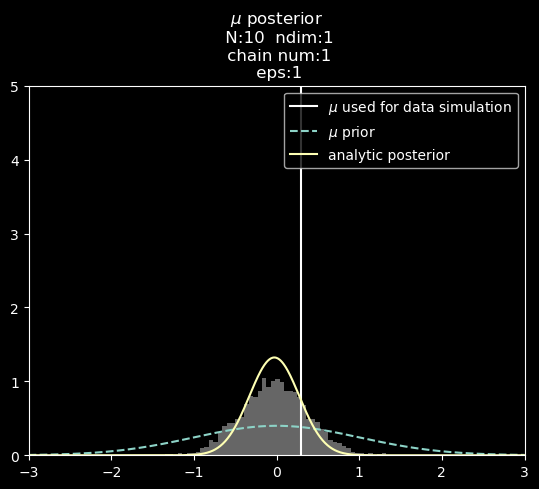

In [11]:
testABC(N = 10, target = "mu", ndim = 1, mu_true = 0.3, sigma2_true = 1, priorArg1 = 0, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  1  dimensional setup
 ####  N = 100  mu_true = 0.4  sigma2_true = 1
 ####  Prior arguments: 0, 1
 ####  ABC epsilon = 1, draws = 5000



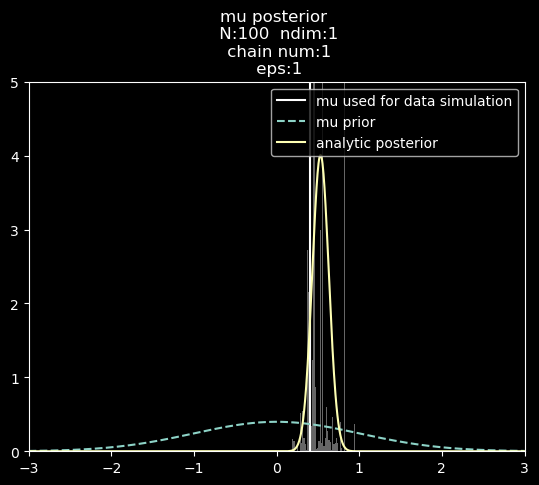

In [13]:
testABC(N = 100, target = "mu", ndim = 1, mu_true = 0.4, sigma2_true = 1, priorArg1 = 0, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  10  dimensional setup
 ####  N = 1  mu_true = 0.8  sigma2_true = 1
 ####  Prior arguments: 0, 1
 ####  ABC epsilon = 1, draws = 5000



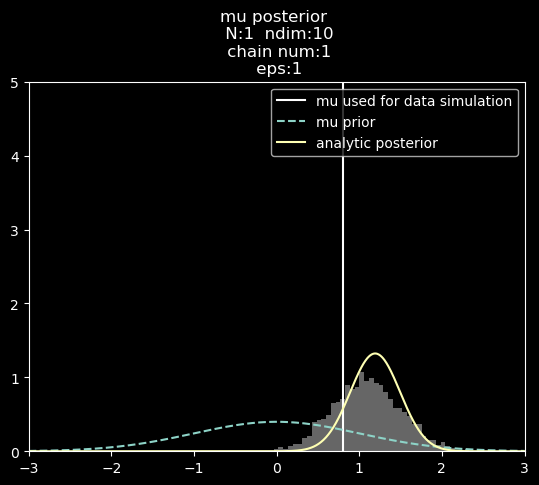

In [19]:
testABC(N = 1, target = "mu", ndim = 10, mu_true = 0.8, sigma2_true = 1, priorArg1 = 0, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  100  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 1
 ####  Prior arguments: 0, 1
 ####  ABC epsilon = 1, draws = 5000



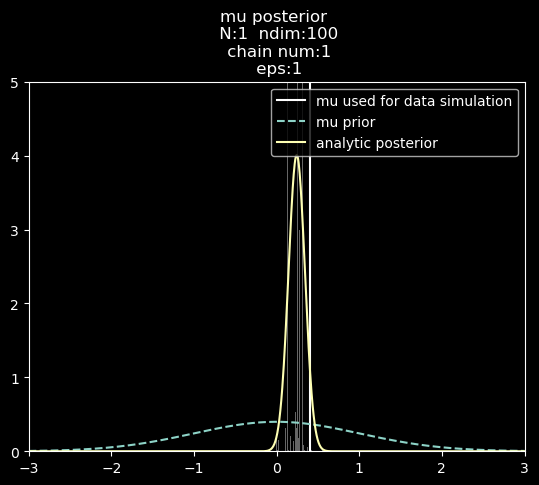

In [18]:
testABC(N = 1, target = "mu", ndim = 100, mu_true = 0.4, sigma2_true = 1, priorArg1 = 0, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  100  dimensional setup
 ####  N = 1  mu_true = 0.8  sigma2_true = 1
 ####  Prior arguments: 0, 1
 ####  ABC epsilon = 1, draws = 5000



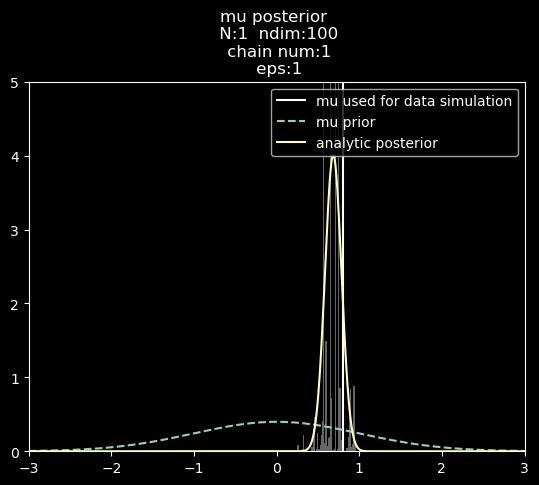

In [24]:
testABC(N = 1, target = "mu", ndim = 100, mu_true = 0.8, sigma2_true = 1, priorArg1 = 0, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  100  dimensional setup
 ####  N = 1  mu_true = 0.8  sigma2_true = 1
 ####  Prior arguments: 0, 1
 ####  ABC epsilon = 0.5, draws = 5000



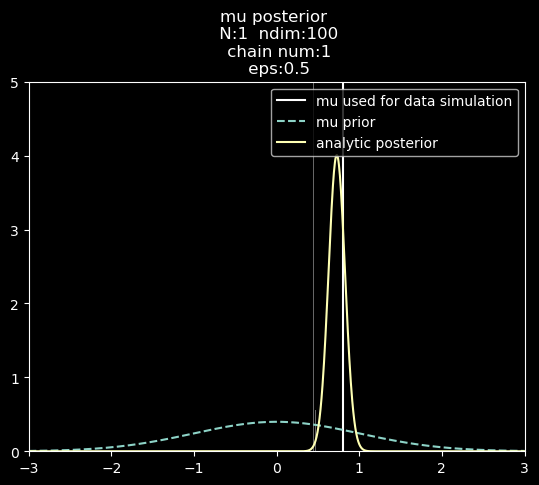

In [25]:
testABC(N = 1, target = "mu", ndim = 100, mu_true = 0.8, sigma2_true = 1, priorArg1 = 0, priorArg2 = 1, eps = 0.5, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  100  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 1
 ####  Prior arguments: 0, 0.5
 ####  ABC epsilon = 1, draws = 5000



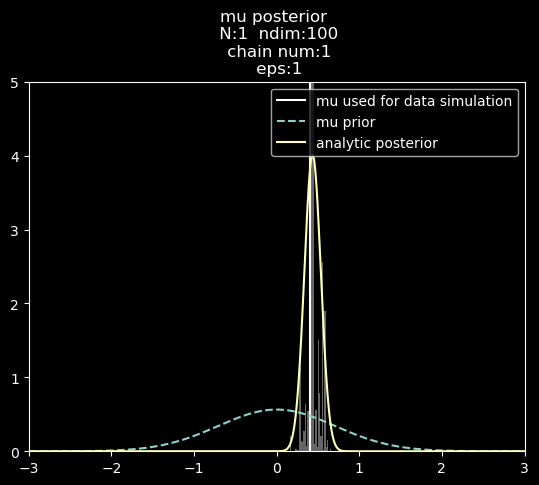

In [26]:
testABC(N = 1, target = "mu", ndim = 100, mu_true = 0.4, sigma2_true = 1, priorArg1 = 0, priorArg2 = 0.5, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  100  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 1
 ####  Prior arguments: 0, 0.5
 ####  ABC epsilon = 0.5, draws = 5000



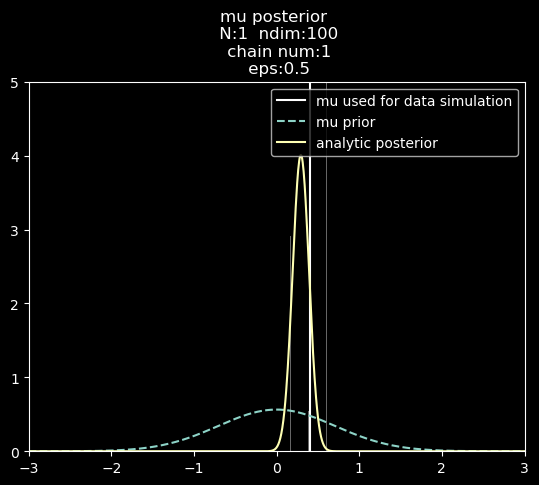

In [27]:
testABC(N = 1, target = "mu", ndim = 100, mu_true = 0.4, sigma2_true = 1, priorArg1 = 0, priorArg2 = 0.5, eps = 0.5, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  100  dimensional setup
 ####  N = 1  mu_true = 0.8  sigma2_true = 1
 ####  Prior arguments: 0, 0.5
 ####  ABC epsilon = 1, draws = 5000



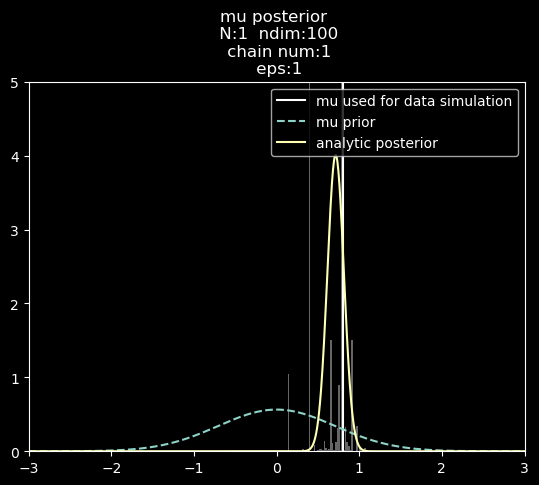

In [28]:
testABC(N = 1, target = "mu", ndim = 100, mu_true = 0.8, sigma2_true = 1, priorArg1 = 0, priorArg2 = 0.5, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  100  dimensional setup
 ####  N = 1  mu_true = 0.8  sigma2_true = 1
 ####  Prior arguments: 0, 0.5
 ####  ABC epsilon = 0.5, draws = 5000



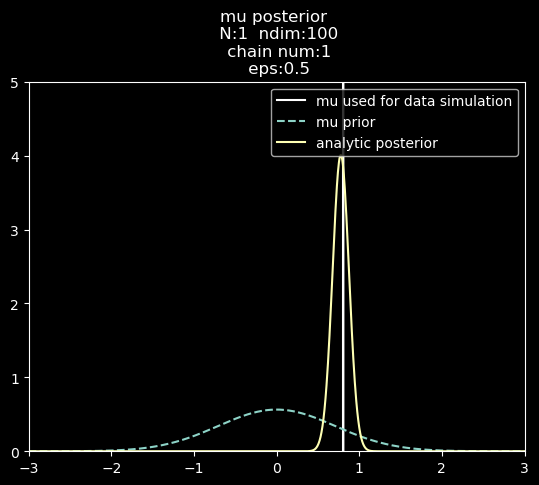

In [29]:
testABC(N = 1, target = "mu", ndim = 100, mu_true = 0.8, sigma2_true = 1, priorArg1 = 0, priorArg2 = 0.5, eps = 0.5, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 1
 ####  Prior arguments: 0, 1
 ####  ABC epsilon = 1, draws = 5000



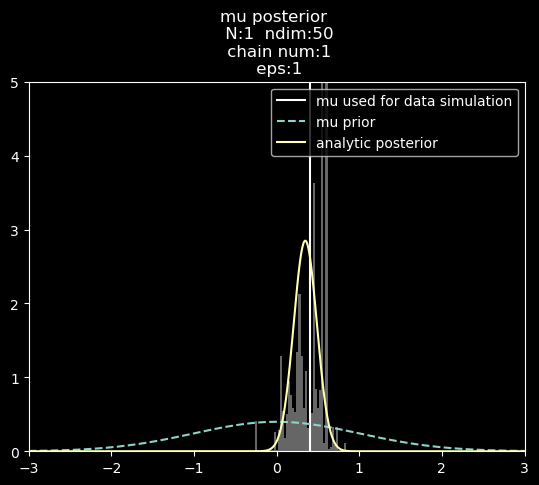

In [30]:
testABC(N = 1, target = "mu", ndim = 50, mu_true = 0.4, sigma2_true = 1, priorArg1 = 0, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 1
 ####  Prior arguments: 0, 1
 ####  ABC epsilon = 0.5, draws = 5000



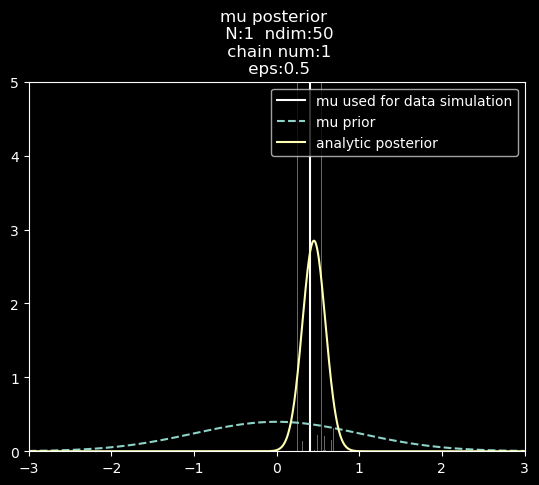

In [31]:
testABC(N = 1, target = "mu", ndim = 50, mu_true = 0.4, sigma2_true = 1, priorArg1 = 0, priorArg2 = 1, eps = 0.5, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.8  sigma2_true = 1
 ####  Prior arguments: 0, 1
 ####  ABC epsilon = 1, draws = 5000



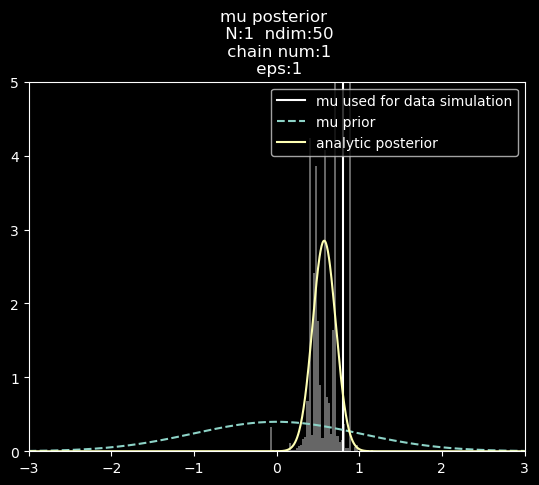

In [32]:
testABC(N = 1, target = "mu", ndim = 50, mu_true = 0.8, sigma2_true = 1, priorArg1 = 0, priorArg2 = 1, eps = 1, draws = 5000)

In [75]:
testABC(N = 1, target = "mu", ndim = 50, mu_true = 0.8, sigma2_true = 1, priorArg1 = 0, priorArg2 = 1, eps = 0.5, draws = 5000)

Initializing SMC sampler...
Sampling 1 chain in 1 job


CPU times: total: 0 ns
Wall time: 0 ns


 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


KeyboardInterrupt: 

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 1
 ####  Prior arguments: 0, 0.5
 ####  ABC epsilon = 1, draws = 5000



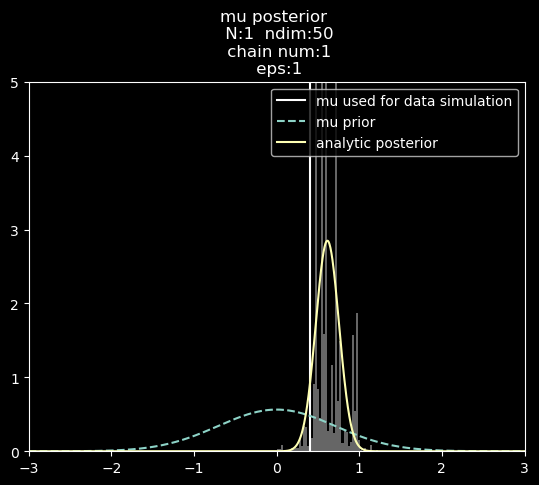

In [34]:
testABC(N = 1, target = "mu", ndim = 50, mu_true = 0.4, sigma2_true = 1, priorArg1 = 0, priorArg2 = 0.5, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.8  sigma2_true = 1
 ####  Prior arguments: 0, 0.5
 ####  ABC epsilon = 1, draws = 5000



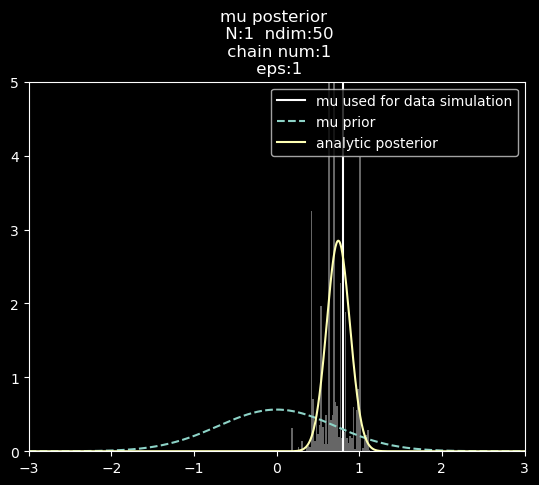

In [36]:
testABC(N = 1, target = "mu", ndim = 50, mu_true = 0.8, sigma2_true = 1, priorArg1 = 0, priorArg2 = 0.5, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 1
 ####  Prior arguments: 0, 0.5
 ####  ABC epsilon = 0.5, draws = 5000



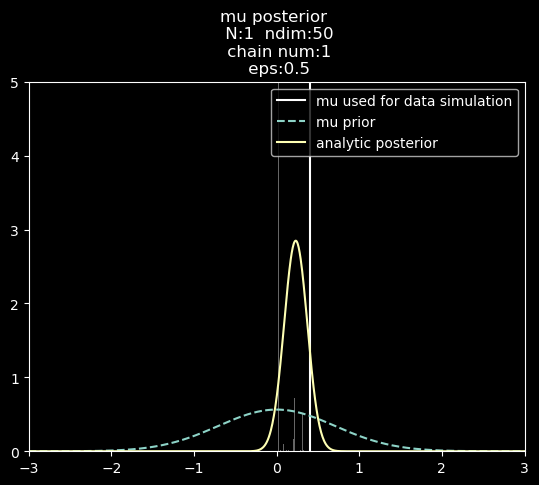

In [35]:
testABC(N = 1, target = "mu", ndim = 50, mu_true = 0.4, sigma2_true = 1, priorArg1 = 0, priorArg2 = 0.5, eps = 0.5, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  mu  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.8  sigma2_true = 1
 ####  Prior arguments: 0, 0.5
 ####  ABC epsilon = 0.5, draws = 5000



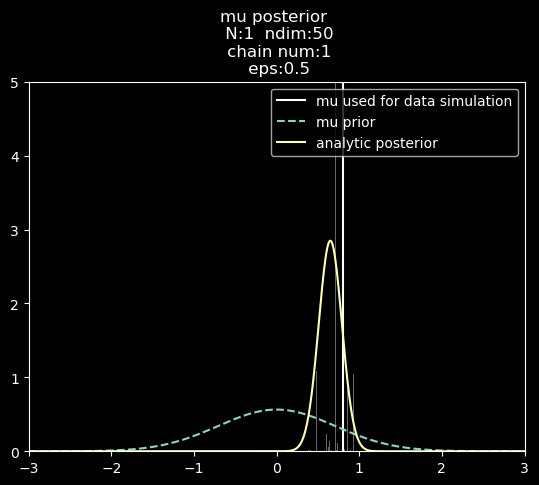

In [37]:
testABC(N = 1, target = "mu", ndim = 50, mu_true = 0.8, sigma2_true = 1, priorArg1 = 0, priorArg2 = 0.5, eps = 0.5, draws = 5000)

Initializing SMC sampler...
Sampling 1 chain in 1 job


CPU times: total: 0 ns
Wall time: 0 ns
 <function gaussian at 0x0000026262B9DFC0>
<function gaussian at 0x0000026262B9DFC0>
<function gaussian at 0x0000026262B9DFC0>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.4  $\sigma^2$_true = 1
 ####  Prior arguments: 1, 1
 ####  ABC epsilon = 1, draws = 5000



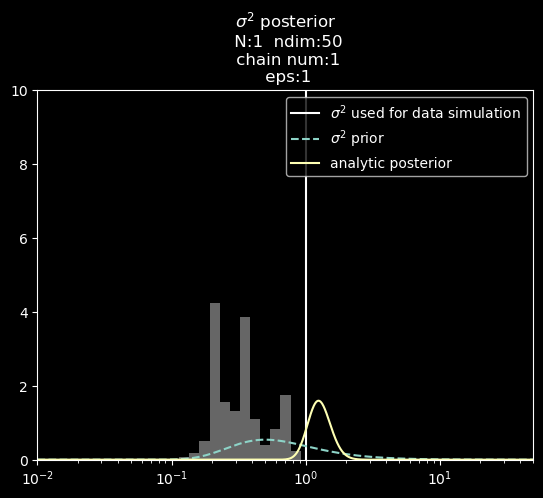

In [12]:
testABC(N = 1, target = "sigma2", ndim = 50, mu_true = 0.4, sigma2_true = 1, priorArg1 = 1, priorArg2 = 1, eps = 1, draws = 5000)

In [4]:
testABC(N = 1, 
        target = "sigma2", 
        ndim = 5, #20 
        mu_true = 0.4, 
        sigma2_true = 1, 
        priorArg1 = 1, priorArg2 = 1, 
        eps = 1, 
        draws = 500)

Initializing SMC sampler...


CPU times: total: 0 ns
Wall time: 0 ns


Sampling 1 chain in 1 job


In [84]:
data_sim = genData(1, 50, 0, 2)
ndim=50


In [85]:
with pm.Model() as ABC_vector_analytic:
    mu = 0 #pm.Normal("mu", 0, 1)
    a = np.ones(ndim)*mu 
    sigma2 = pm.InverseGamma("sigma2", 2,1) 

    data= pm.MvNormal("data", a, np.identity(ndim)*sigma2, observed = data_sim)

In [86]:
trace_analytic = pm.sample_smc(model = ABC_vector_analytic, chains = 1, cores = 1, draws = 5000)

Only one chain was sampled, this makes it impossible to run some convergence checks


C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


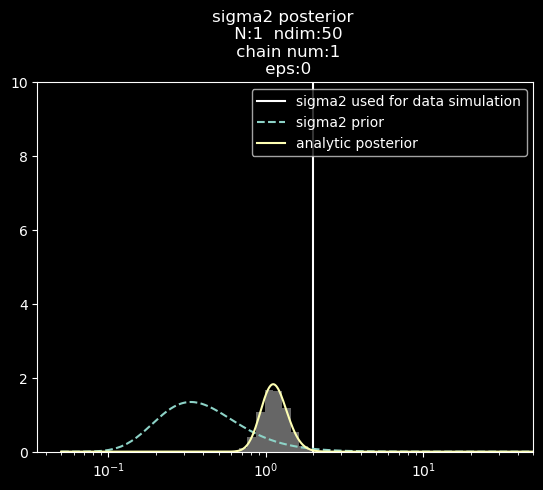

In [87]:
plot_posterior_hist_sigma2(res = trace_analytic, data = data_sim, sigma2_true = 2, ig_1 = 2, ig_2 = 1, mu_true = 0, N = 1, ndim = 50, chain_num=1, eps=0)


C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


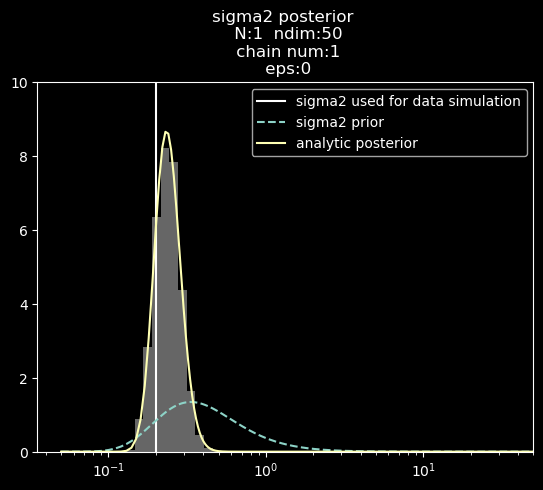

In [56]:
plot_posterior_hist_sigma2(res = trace_analytic, data = data_sim, sigma2_true = sigma2_true, ig_1 = 2, ig_2 = 1, mu_true = mu_true, N = N, ndim = ndim, chain_num=1, eps=0)


 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 0.1
 ####  Prior arguments: 1, 1
 ####  ABC epsilon = 1, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


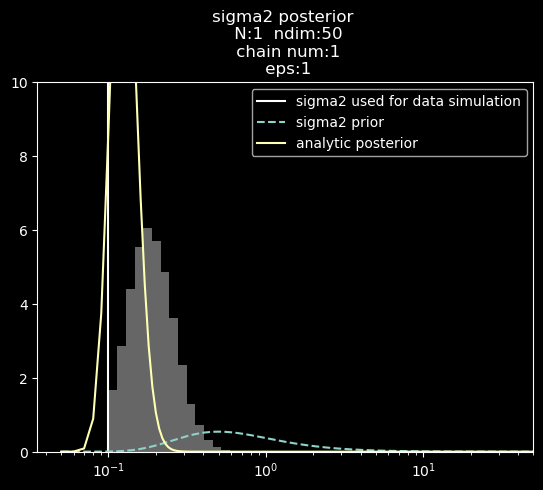

In [79]:
testABC(N = 1, target = "sigma2", ndim = 50, mu_true = 0.4, sigma2_true = 0.1, priorArg1 = 1, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks
C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)



 
 ####  Inferring  sigma2  in a  10  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 2
 ####  Prior arguments: 1, 1
 ####  ABC epsilon = 1, draws = 5000



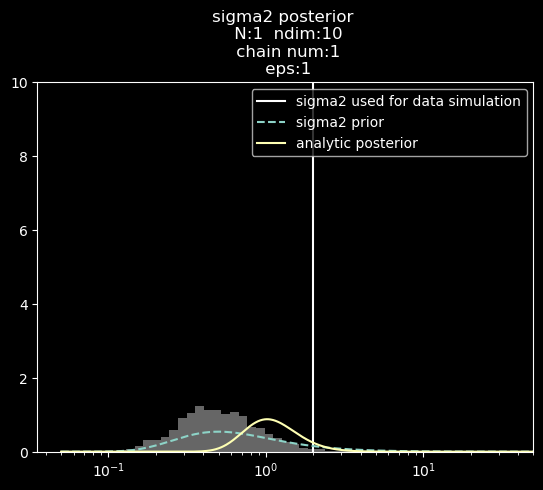

In [82]:
testABC(N = 1, target = "sigma2", ndim = 10, mu_true = 0.4, sigma2_true = 2, priorArg1 = 1, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  100  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 0.1
 ####  Prior arguments: 1, 1
 ####  ABC epsilon = 1, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


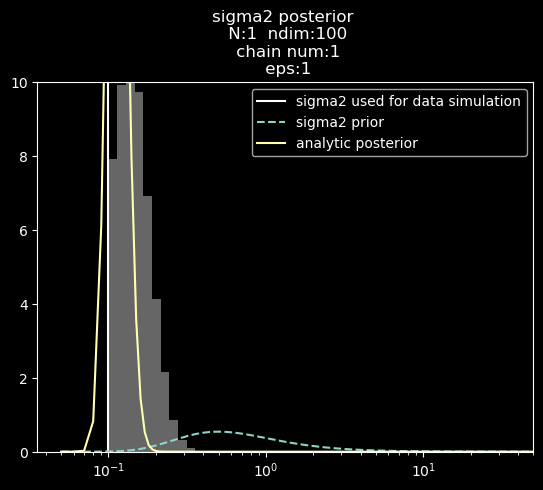

In [81]:
testABC(N = 1, target = "sigma2", ndim = 100, mu_true = 0.4, sigma2_true = 0.1, priorArg1 = 1, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  100  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 0.1
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


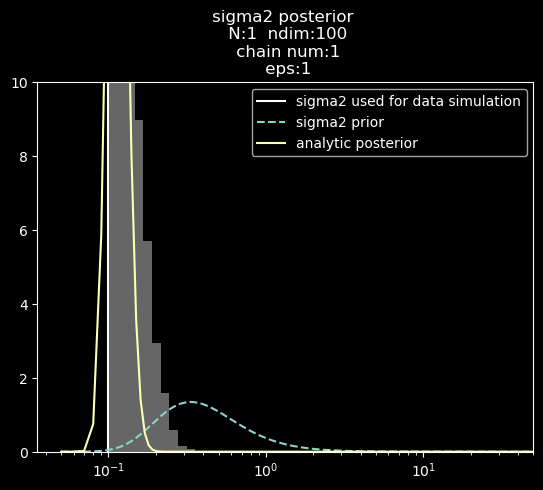

In [80]:
testABC(N = 1, target = "sigma2", ndim = 100, mu_true = 0.4, sigma2_true = 0.1, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)

Initializing SMC sampler...
Sampling 1 chain in 1 job


CPU times: total: 0 ns
Wall time: 0 ns


 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 0.1
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


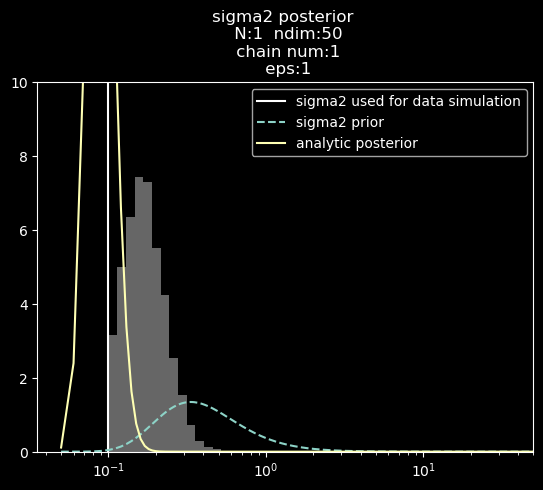

In [78]:
testABC(N = 1, target = "sigma2", ndim = 50, mu_true = 0.4, sigma2_true = 0.1, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  10  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 0.1
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


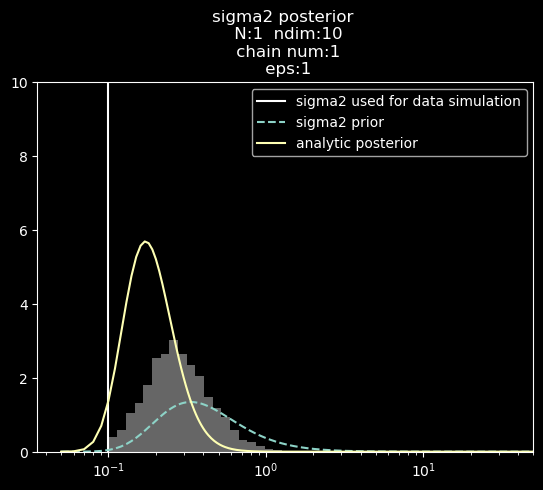

In [77]:
testABC(N = 1, target = "sigma2", ndim = 10, mu_true = 0.4, sigma2_true = 0.1, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)

Initializing SMC sampler...
Sampling 1 chain in 1 job


CPU times: total: 0 ns
Wall time: 0 ns


 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  10  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 0.2
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


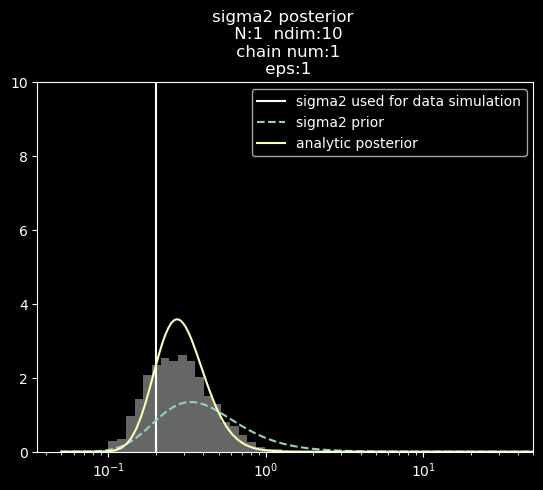

In [76]:
testABC(N = 1, target = "sigma2", ndim = 10, mu_true = 0.4, sigma2_true = 0.2, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks
C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)



 
 ####  Inferring  sigma2  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 0.2
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



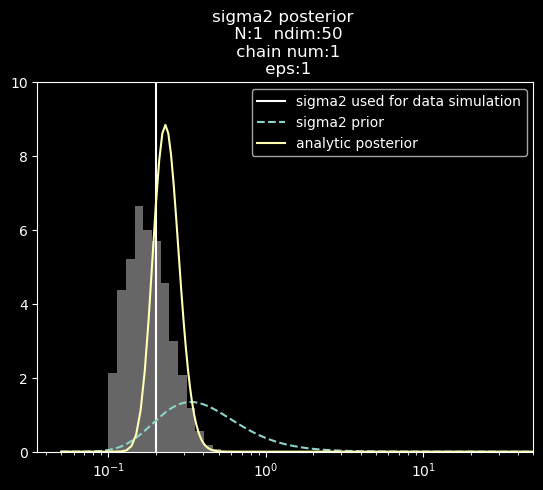

In [59]:
testABC(N = 1, target = "sigma2", ndim = 50, mu_true = 0.4, sigma2_true = 0.2, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)

In [1]:
testABC(N = 1, target = "sigma2", ndim = 50, mu_true = 0.4, sigma2_true = 0.1, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)

NameError: name 'testABC' is not defined

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks
C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)



 
 ####  Inferring  sigma2  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 0.5
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



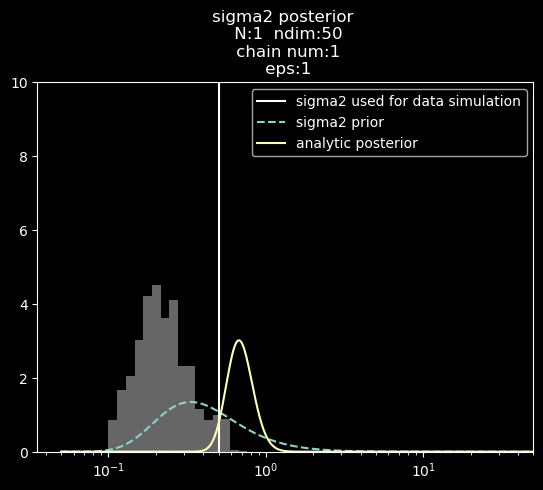

In [67]:
#logged
testABC(N = 1, target = "sigma2", ndim = 50, mu_true = 0.4, sigma2_true = 0.5, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  50  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 0.5
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 0.5, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


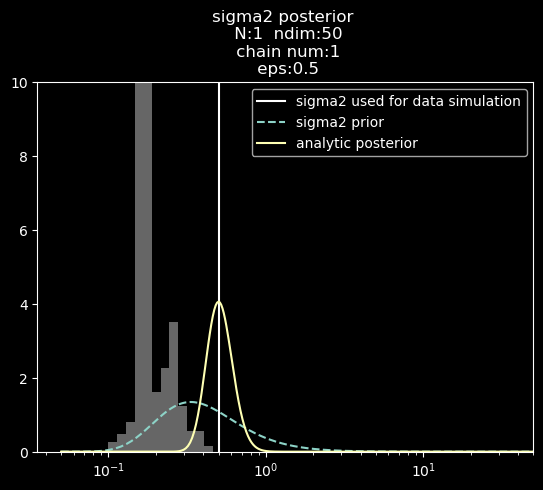

In [60]:
#logged
testABC(N = 1, target = "sigma2", ndim = 50, mu_true = 0.4, sigma2_true = 0.5, priorArg1 = 2, priorArg2 = 1, eps = 0.5, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  100  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 0.5
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


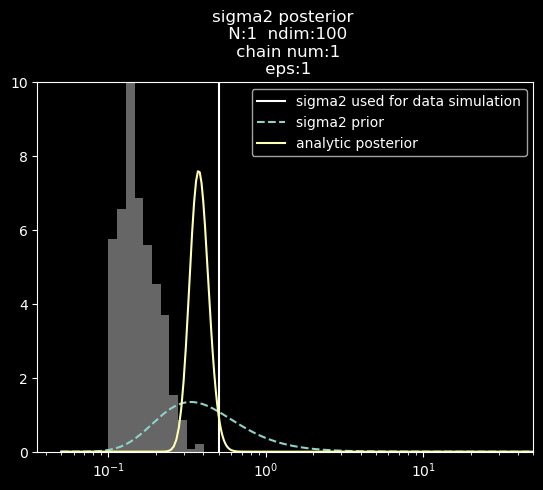

In [61]:
#logged
testABC(N = 1, target = "sigma2", ndim = 100, mu_true = 0.4, sigma2_true = 0.5, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  100  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 0.5
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 0.5, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


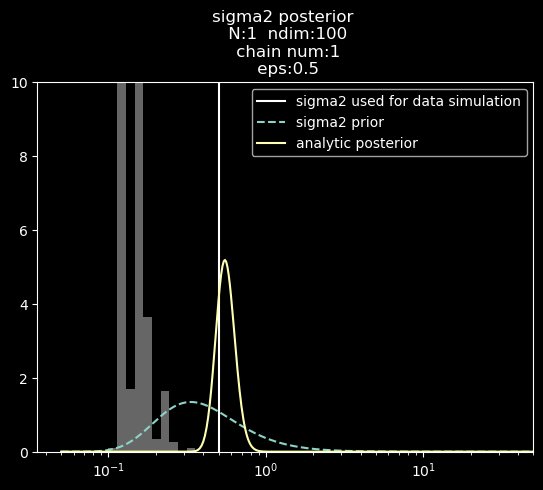

In [62]:
#logged
testABC(N = 1, target = "sigma2", ndim = 100, mu_true = 0.4, sigma2_true = 0.5, priorArg1 = 2, priorArg2 = 1, eps = 0.5, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  50  dimensional setup
 ####  N = 1  mu_true = 0  sigma2_true = 0.5
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


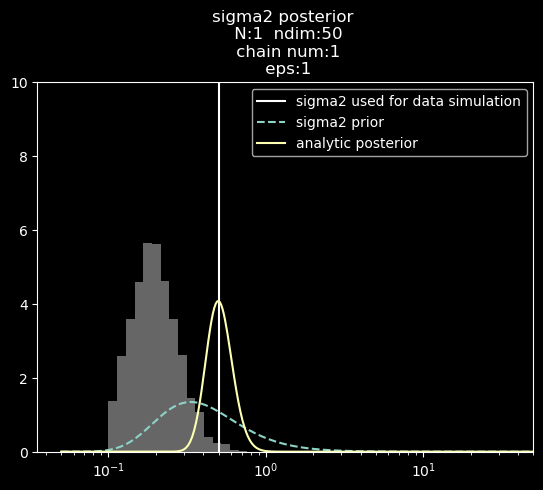

In [63]:
#logged
# I don't understand this
testABC(N = 1, target = "sigma2", ndim = 50, mu_true = 0, sigma2_true = 0.5, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks
C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)



 
 ####  Inferring  sigma2  in a  50  dimensional setup
 ####  N = 1  mu_true = 0  sigma2_true = 0.5
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 0.5, draws = 5000



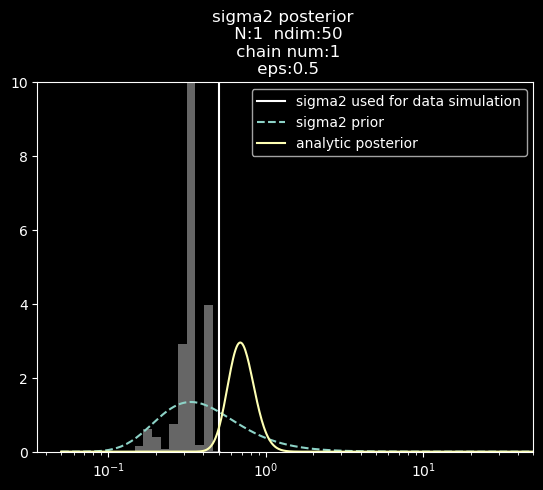

In [64]:
#logged
testABC(N = 1, target = "sigma2", ndim = 50, mu_true = 0, sigma2_true = 0.5, priorArg1 = 2, priorArg2 = 1, eps = 0.5, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  100  dimensional setup
 ####  N = 1  mu_true = 0  sigma2_true = 0.5
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


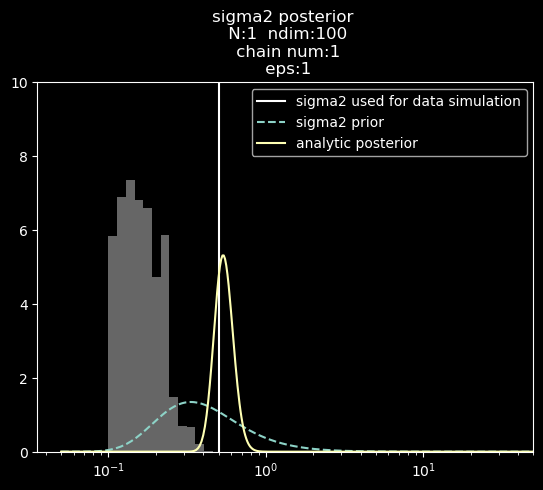

In [65]:
#logged
testABC(N = 1, target = "sigma2", ndim = 100, mu_true = 0, sigma2_true = 0.5, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  100  dimensional setup
 ####  N = 1  mu_true = 0  sigma2_true = 0.5
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 0.5, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


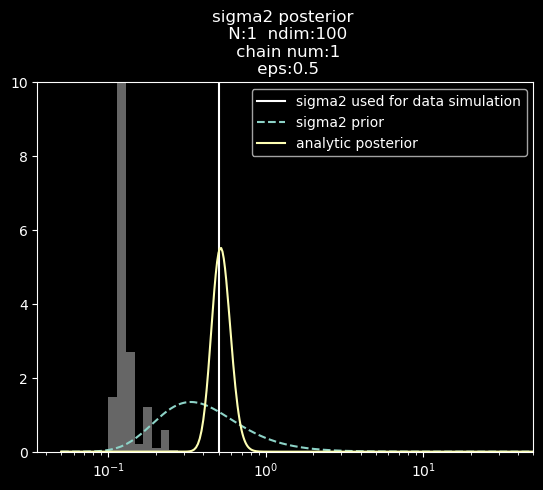

In [66]:
#logged
testABC(N = 1, target = "sigma2", ndim = 100, mu_true = 0, sigma2_true = 0.5, priorArg1 = 2, priorArg2 = 1, eps = 0.5, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks
C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\1648035767.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)



 
 ####  Inferring  sigma2  in a  1  dimensional setup
 ####  N = 10  mu_true = 0.4  sigma2_true = 1
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



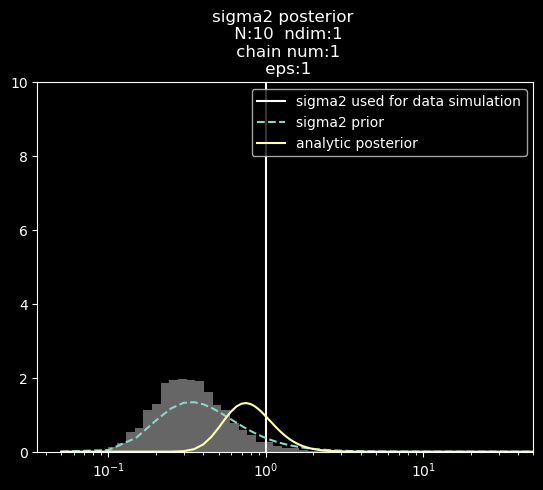

In [17]:
# logged
testABC(N = 10, target = "sigma2", ndim = 1, mu_true = 0.4, sigma2_true = 1, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks
C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\1648035767.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)



 
 ####  Inferring  sigma2  in a  1  dimensional setup
 ####  N = 100  mu_true = 0.4  sigma2_true = 1
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



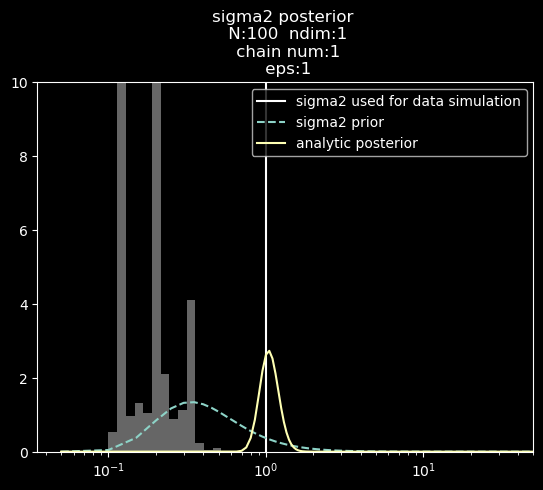

In [16]:
#logged
testABC(N = 100, target = "sigma2", ndim = 1, mu_true = 0.4, sigma2_true = 1, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)

 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks



 
 ####  Inferring  sigma2  in a  1  dimensional setup
 ####  N = 100  mu_true = 0  sigma2_true = 1
 ####  Prior arguments: 0, 5
 ####  ABC epsilon = 1, draws = 5000



C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


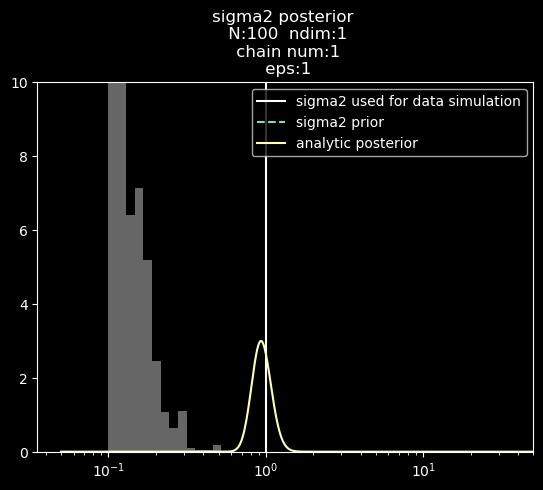

In [74]:
#match sbi
testABC(N = 100, target = "sigma2", ndim = 1, mu_true = 0, sigma2_true = 1, priorArg1 = 0, priorArg2 = 5, eps = 1, draws = 5000)


 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks
C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)



 
 ####  Inferring  sigma2  in a  10  dimensional setup
 ####  N = 1  mu_true = 0  sigma2_true = 1
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



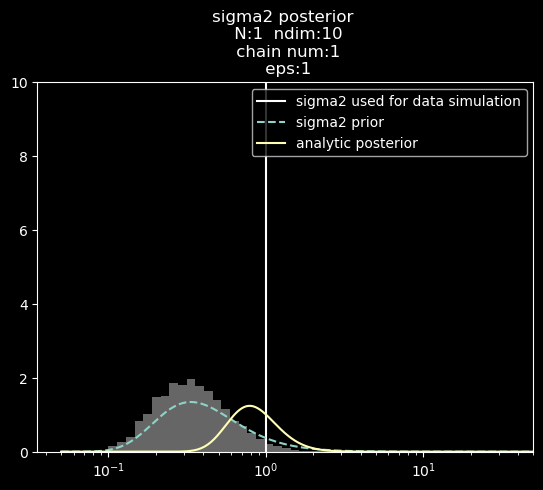

In [70]:
testABC(N = 1, target = "sigma2", ndim = 10, mu_true = 0, sigma2_true = 1, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)


 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks
C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)



 
 ####  Inferring  sigma2  in a  10  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 1
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



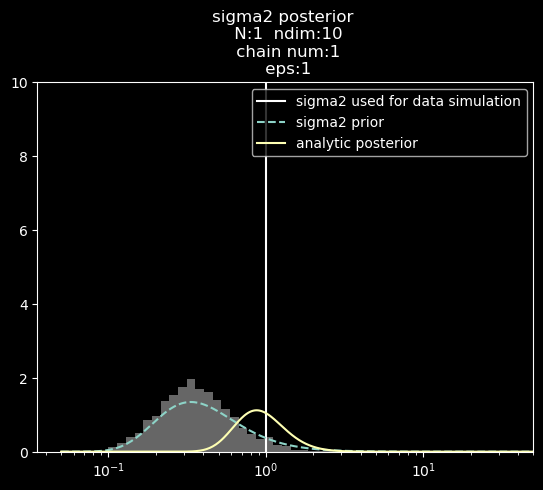

In [68]:
#logged
testABC(N = 1, target = "sigma2", ndim = 10, mu_true = 0.4, sigma2_true = 1, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)


 <function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>
<function gaussian at 0x0000024CF9949F30>


Only one chain was sampled, this makes it impossible to run some convergence checks
C:\Users\szabo\AppData\Local\Temp\ipykernel_5300\470489445.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)



 
 ####  Inferring  sigma2  in a  100  dimensional setup
 ####  N = 1  mu_true = 0.4  sigma2_true = 1
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 5000



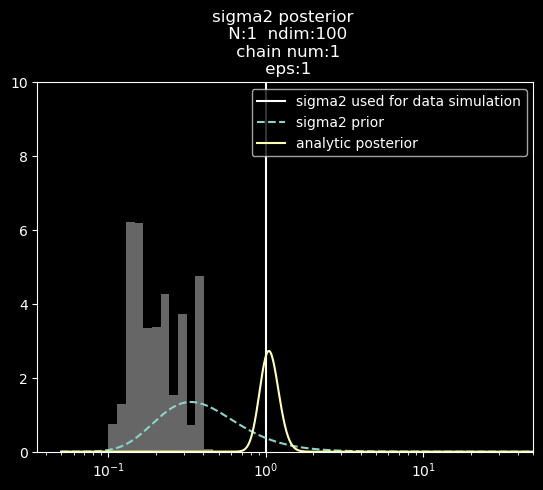

In [69]:
#logged
testABC(N = 1, target = "sigma2", ndim = 100, mu_true = 0.4, sigma2_true = 1, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 5000)


 <function gaussian at 0x000001A6F9819F30>
<function gaussian at 0x000001A6F9819F30>
<function gaussian at 0x000001A6F9819F30>

 
 ####  Inferring  sigma2  in a  1  dimensional setup
 ####  N = 10  mu_true = 0.3  sigma2_true = 1
 ####  Prior arguments: 2, 1
 ####  ABC epsilon = 1, draws = 50



c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pymc\smc\sampling.py:239: UserWarning: The number of samples is too small to check convergence reliably.
  _compute_convergence_checks(idata, draws, model, trace)
C:\Users\szabo\AppData\Local\Temp\ipykernel_19816\1648035767.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0.0, 50)


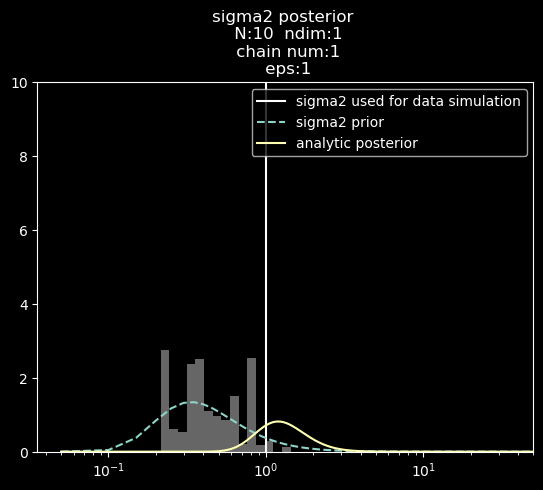

In [158]:
testABC(N = 10, target = "sigma2", ndim = 1, mu_true = 0.3, sigma2_true = 1, priorArg1 = 2, priorArg2 = 1, eps = 1, draws = 50)

In [9]:
def testABC(N, target, ndim, mu_true, sigma2_true, priorArg1, priorArg2, eps, draws):
    data, model = genDatawModel(N = N, mu_true = mu_true, sigma2_true = sigma2_true, target = target, ndim = ndim, priorArg1 = priorArg1, priorArg2 = priorArg2, eps = eps)
    chain_num = 1

    %time 
    trace = pm.sample_smc(model = model, chains = chain_num, cores = 1, draws = draws)
        
    print("\n \n ####  Inferring  "+str(target)+"  in a  "+str(ndim)+"  dimensional setup")
    print(" ####  N = "+str(N)+"  mu_true = "+str(mu_true)+"  sigma2_true = "+str(sigma2_true))
    print(" ####  Prior arguments: "+str(priorArg1)+", "+str(priorArg2))
    print(" ####  ABC epsilon = "+str(eps)+", draws = "+str(draws)+"\n")

    if target == "mu":
        plot_posterior_hist_mu(res = trace, data = data, mu_true = mu_true, norm_1 = priorArg1, norm_2 = priorArg2, sigma2_true = sigma2_true, N = N, ndim = ndim, chain_num=chain_num, eps=eps)
    if target == "sigma2":
        plot_posterior_hist_sigma2(res = trace, data = data, sigma2_true = sigma2_true, ig_1 = priorArg1, ig_2 = priorArg2, mu_true = mu_true, N = N, ndim = ndim, chain_num=chain_num, eps=eps)


In [55]:
def plot_posterior_hist_sigma2(res, data, sigma2_true, ig_1, ig_2, mu_true, N, ndim, chain_num, eps):
    plt.hist(res.posterior.sigma2[0,:], bins=np.logspace(np.log10(0.1),np.log10(50.0), 50), density=True, color='gray', alpha=0.8)
    plt.axvline(x = sigma2_true, label = 'sigma2 used for data simulation')
    x = np.linspace (0.05, 50, 5000) 

    #calculate pdf of Gamma distribution for each x-value
    y = st.invgamma.pdf(x, a = ig_1, loc = 0, scale = ig_2)
    plt.plot(x, y, linestyle='dashed', label='sigma2 prior' )

    
    #sigmaPost_x, sigmaPost_value=forplot_sigma_posterior(res, inv_1, inv_2)
    #plt.plot(sigmaPost_x, sigmaPost_value, color='black', label='analytic posterior' )

    xmin, xmax = plt.xlim()
    #xx = np.linspace(xmin, xmax, 100)
    postig_1 = ig_1 + max(N, ndim)/2
    postig_2 = ig_2 + 0.5 * sum((data - mu_true) ** 2)
    plt.plot(x, st.invgamma.pdf(x, a = postig_1, loc = 0, scale = postig_2), alpha=1, label="analytic posterior")


    ax=plt.gca()
    ax.set_xscale('log')
    ax.set_xlim(0.0, 50)
    ax.set_ylim(0.0, 10)

    plt.legend(loc="upper right")
    plt.title('sigma2 posterior \n N:'+str(N) +'  ndim:'+str(ndim) + '\n chain num:' + str(chain_num)+'\n eps:'+str(eps))
    plt.show()

In [11]:
def plot_posterior_hist_mu(res, data, mu_true, norm_1, norm_2, sigma2_true, N, ndim, chain_num, eps):
    plt.hist(res.posterior.mu[0,:], bins=50, density=True, color='gray', alpha=0.8)
    plt.axvline(x = mu_true, label = 'mu used for data simulation')
    x = np.linspace(-3, 3, 1000) 

    #calculate pdf of Gamma distribution for each x-value
    y = st.norm.pdf(x, norm_1, np.sqrt(norm_2))
    plt.plot(x, y, linestyle='dashed', label='mu prior' )

    muPost_m = 1/(1 + sigma2_true / max(ndim,N)) * np.mean(data)
    muPost_var = 1/(1 + max(ndim,N) / sigma2_true)
    muPost = st.norm.pdf(x, muPost_m, np.sqrt(muPost_var))
    #sigmaPost_x, sigmaPost_value=forplot_sigma_posterior(res, inv_1, inv_2)
    plt.plot(x, muPost, label='analytic posterior' )
  
    ax=plt.gca()
    #ax.set_xscale('log')
    ax.set_xlim(-3, 3)
    ax.set_ylim(0.0, 5)

    plt.legend(loc="upper right")
    plt.title('mu posterior \n N:'+str(N) +'  ndim:'+str(ndim) + '\n chain num:' + str(chain_num)+'\n eps:'+str(eps))
    plt.show()